In [2]:
#%%
from vnpy.app.cta_strategy.backtesting import BacktestingEngine, OptimizationSetting
from vnpy.app.cta_strategy.strategies.adx_atr_strategy import (
    AdxAtrStrategy,
)
from vnpy.app.cta_strategy.strategies.boll_atr_strategy import (
    BollAtrStrategy,
)
from vnpy.app.cta_strategy.strategies.cci_atr_strategy import (
    CciAtrStrategy,
)
from vnpy.app.cta_strategy.strategies.donchian_atr_strategy import (
    DonchianAtrStrategy,
)
from vnpy.app.cta_strategy.strategies.macd_atr_strategy import (
    MacdAtrStrategy,
)
from vnpy.app.cta_strategy.strategies.keltner_atr_strategy import (
    KeltnerAtrStrategy,
)
from vnpy.app.cta_strategy.strategies.rsi_atr_strategy import (
    RsiAtrStrategy,
)
from datetime import datetime
from importlib import reload

In [5]:
#%%
engine = BacktestingEngine()
engine.set_parameters(
    vt_symbol="ETHUSD.BITMEX",
    interval="1m",
    start=datetime(2019, 1, 1),
    end=datetime(2019, 9, 1),
    rate=0.3/10000 * 0.0,
    slippage=0.05,
    size=1,
    pricetick=0.05,
    capital=1_000_000,
)
engine.add_strategy(DonchianAtrStrategy, dict())

vnpy.app.cta_strategy.strategies.donchian_atr_strategy


2019-09-07 11:49:17.679192	开始加载历史数据
2019-09-07 11:49:20.362291	加载进度：[12%]
2019-09-07 11:49:23.002356	加载进度：[25%]
2019-09-07 11:49:25.752323	加载进度：[37%]
2019-09-07 11:49:28.506910	加载进度：[49%]
2019-09-07 11:49:31.184678	加载进度：[62%]
2019-09-07 11:49:34.139706	加载进度：[74%]
2019-09-07 11:49:36.949292	加载进度：[86%]
2019-09-07 11:49:39.757961	加载进度：[99%]
2019-09-07 11:49:40.010960	加载进度：[100%]
2019-09-07 11:49:40.010960	历史数据加载完成，数据量：349929
2019-09-07 11:49:40.363964	策略初始化完成
2019-09-07 11:49:40.363964	开始回放历史数据
2019-09-07 11:49:54.981944	历史数据回放结束
2019-09-07 11:49:54.982943	开始计算逐日盯市盈亏
2019-09-07 11:49:55.006942	逐日盯市盈亏计算完成
2019-09-07 11:49:55.006942	开始计算策略统计指标
2019-09-07 11:49:55.021973	------------------------------
2019-09-07 11:49:55.021973	首个交易日：	2019-01-11
2019-09-07 11:49:55.021973	最后交易日：	2019-09-01
2019-09-07 11:49:55.021973	总交易日：	234
2019-09-07 11:49:55.021973	盈利交易日：	109
2019-09-07 11:49:55.021973	亏损交易日：	125
2019-09-07 11:49:55.021973	起始资金：	1,000,000.00
2019-09-07 11:49:55.021973	结束资金：	991,767.35
20

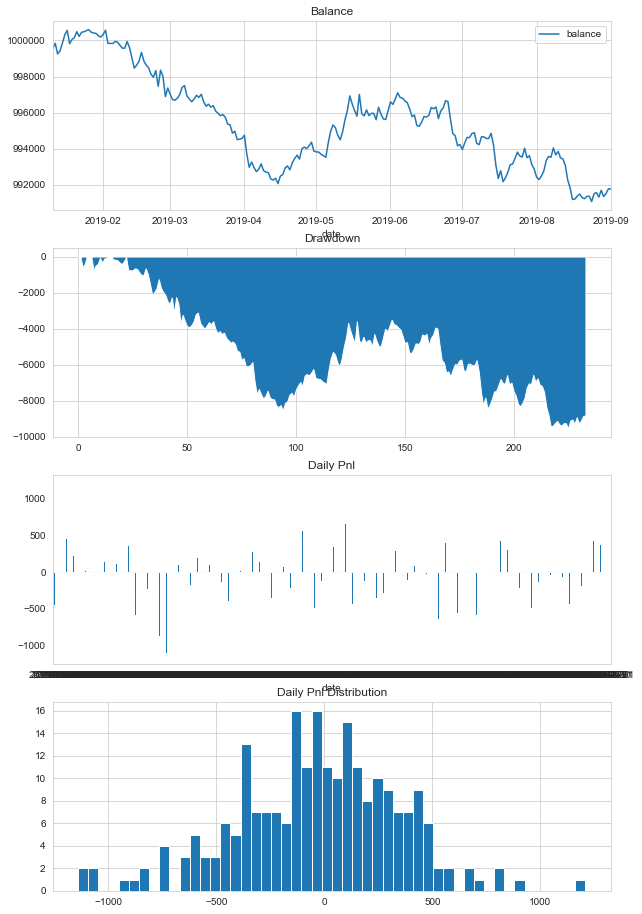

In [6]:
#%%
engine.load_data()
engine.run_backtesting()
df = engine.calculate_result()
engine.calculate_statistics()
engine.show_chart()

In [ ]:
setting = OptimizationSetting()
# setting.set_target("sharpe_ratio")
setting.set_target("end_balance")
setting.add_parameter("atr_length", 3, 39, 1)
setting.add_parameter("atr_ma_length", 10, 30, 1)
setting.add_parameter("rsi_length", 3, 20, 1)

engine.run_ga_optimization(setting, 10, 10)